In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
from rapidfuzz import process, fuzz

warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# load and inspect the final_dataset
# Import necessary libraries

# Load the parquet file
df = pd.read_parquet('Data Cleaning/final_dataset2.parquet')

# Display the shape of the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")

print("\n" + "="*50)

# Display column names
print("Column Names:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*50)

# Additional useful information
print("Dataset Info:")
print("="*50)
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data types:")
print(df.dtypes.value_counts())

print("\n" + "="*50)

# Display first few rows
print("First 5 rows:")
print("="*50)
df.head()

Dataset Shape: (2870, 12)
Number of rows: 2,870
Number of columns: 12

Column Names:
 1. official_name
 2. level
 3. speakers
 4. country
 5. official
 6. regional
 7. minority
 8. national
 9. widely_spoken
10. country_count
11. max_urbanization
12. max_internet_use

Dataset Info:
Memory usage: 0.69 MB
Data types:
int64      7
object     3
float64    2
Name: count, dtype: int64

First 5 rows:


,official_name,level,speakers,country,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use
0,!Xun,Vulnerable,18000,South Africa;Namibia;Angola,0,0,0,0,0,3,68.819,75.7
1,(Lower) Tanana,Critically Endangered,25,United States,0,0,0,0,0,1,83.298,93.1
2,A'ingae,Vulnerable,1500,Colombia;Ecuador,0,0,0,0,0,2,82.354,77.3
3,Aasáx,Extinct,0,Tanzania,0,0,0,0,0,1,37.409,29.1
4,Abaga,Critically Endangered,5,Papua New Guinea,0,0,0,0,0,1,13.723,24.1


In [5]:
df.head(100)

print(df['level'].unique())

print(df['widely_spoken'].unique() )
print(df['official'].unique() )
print(df['regional'].unique() )
print(df['national'].unique() )
print(df['minority'].unique() )

filtered_df = df[df['official'] == 5]
print(filtered_df)

['Vulnerable' 'Critically Endangered' 'Extinct' 'Endangered' 'Threatened'
 'Severely Endangered' 'At risk' 'Not Endangered']
[ 0  1  2 36  3  7 12 27 10  4]
[ 0  2  1  3  7  6  5 96  4 28 11 10 98 61 18 26 21]
[ 0  1  5  2  3  8 20  7 12  6 67  4 13]
[ 0  2  1  4  5  3 15 10 50 19]
[ 0 11  1  8  7  4  3  2 21  5 15  6 75]
     official_name                  level  speakers  \
336             Bo    Severely Endangered        76   
1698          Nese  Critically Endangered        15   
2805       Italian         Not Endangered  66200000   
2817         Malay         Not Endangered  29500000   

                                                country  official  regional  \
336                                    Papua New Guinea         5         1   
1698                                            Vanuatu         5         3   
2805  Albania;Argentina;Croatia;Eritrea;Italy;Sovere...         5         0   
2817  Brunei;Christmas Island;Cocos Islands;India;In...         5         0   

    

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example with Random Forest
X = df.iloc[:, 4:12]  # columns 5-12 (0-indexed)
y = df['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.384

Classification Report:
                       precision    recall  f1-score   support

              At risk       0.17      0.05      0.08        19
Critically Endangered       0.34      0.49      0.40       116
           Endangered       0.41      0.64      0.50       196
              Extinct       0.00      0.00      0.00        52
       Not Endangered       0.72      0.78      0.75        27
  Severely Endangered       0.13      0.02      0.03       100
           Threatened       0.38      0.41      0.39       224
           Vulnerable       0.36      0.27      0.31       127

             accuracy                           0.38       861
            macro avg       0.31      0.33      0.31       861
         weighted avg       0.33      0.38      0.34       861



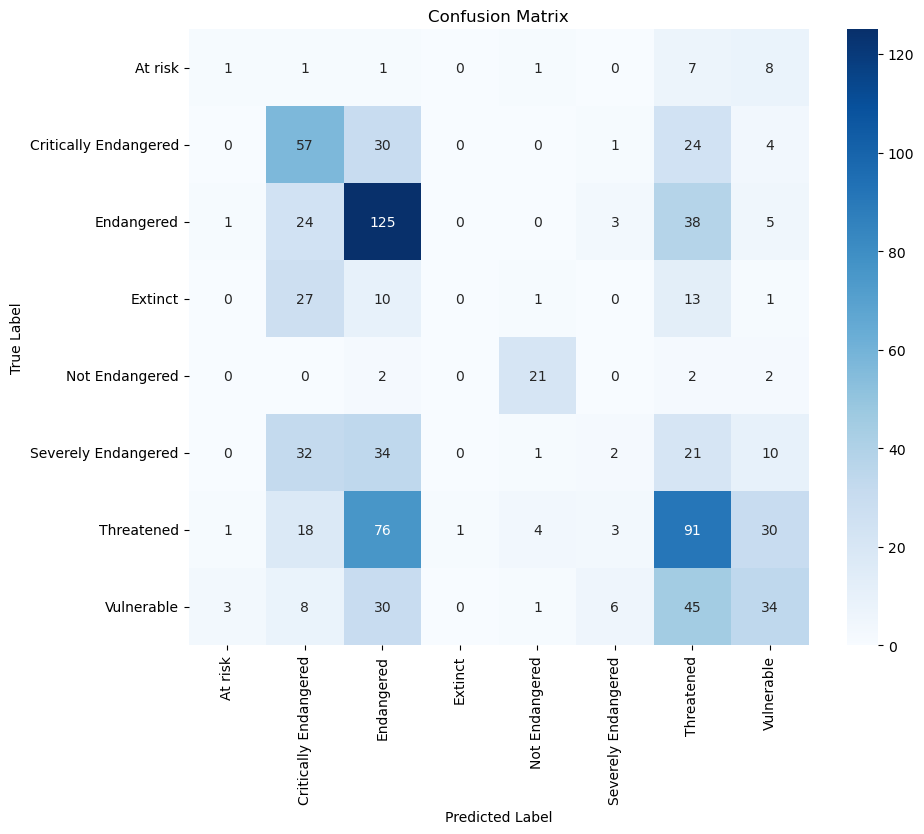

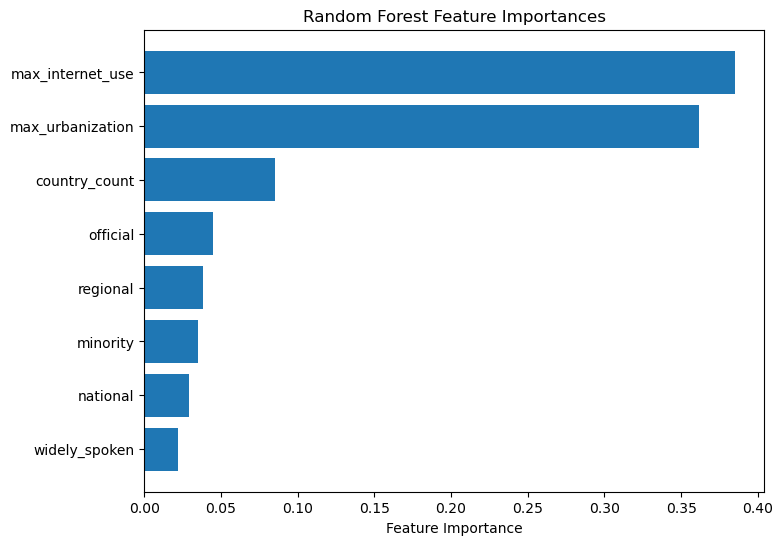


Feature Importance:
            feature  importance
7  max_internet_use    0.384977
6  max_urbanization    0.361592
5     country_count    0.085429
0          official    0.044556
1          regional    0.038115
2          minority    0.034694
3          national    0.028863
4     widely_spoken    0.021774

Cross-validation scores: [0.35820896 0.41542289 0.38308458 0.40547264 0.37157107]
Mean CV accuracy: 0.387 (+/- 0.042)

Training accuracy: 0.505
Testing accuracy: 0.384
Overfitting gap: 0.120


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = rf.predict(X_test)

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

# 5. Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 6. Check for overfitting
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(f"\nTraining accuracy: {train_score:.3f}")
print(f"Testing accuracy: {test_score:.3f}")
print(f"Overfitting gap: {train_score - test_score:.3f}")

In [8]:
comma_separated_names = ','.join(df['official_name'].astype(str))

# Write to file
with open('official_names.txt', 'w') as file:
    file.write(comma_separated_names)

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Comprehensive dictionary mapping languages to their primary TLD
# This mapping includes major languages and their associated country TLDs
LANGUAGE_TLD_MAP = {
    # Major world languages
    'English': 'com',
    'Mandarin Chinese': 'cn',
    'Hindi': 'in',
    'Spanish': 'es',
    'Modern Standard Arabic': 'sa',
    'French': 'fr',
    'Bengali': 'bd',
    'Portuguese': 'pt',
    'Russian': 'ru',
    'Indonesian': 'id',
    'Urdu': 'pk',
    'Standard German': 'de',
    'Japanese': 'jp',
    'Vietnamese': 'vn',
    'Hausa': 'ng',
    'Turkish': 'tr',
    'Western Punjabi': 'pk',
    'Swahili': 'ke',
    'Tagalog': 'ph',
    'Tamil': 'in',
    'Yue Chinese': 'hk',
    'Iranian Persian': 'ir',
    'Korean': 'kr',
    'Thai': 'th',
    'Javanese': 'id',
    'Italian': 'it',
    'Levantine Arabic': 'lb',
    'Sudanese Arabic': 'sd',
    
    # Additional languages with clear geographic associations
    'Afrikaans': 'za',
    'Albanian': 'al',
    'Amharic': 'et',
    'Armenian': 'am',
    'Azerbaijani': 'az',
    'Bulgarian': 'bg',
    'Burmese': 'mm',
    'Catalan': 'es',
    'Croatian': 'hr',
    'Czech': 'cz',
    'Danish': 'dk',
    'Dutch': 'nl',
    'Estonian': 'ee',
    'Finnish': 'fi',
    'Georgian': 'ge',
    'Greek': 'gr',
    'Hebrew': 'il',
    'Hungarian': 'hu',
    'Icelandic': 'is',
    'Kazakh': 'kz',
    'Khmer': 'kh',
    'Latvian': 'lv',
    'Lithuanian': 'lt',
    'Macedonian': 'mk',
    'Malay': 'my',
    'Mongolian': 'mn',
    'Nepali': 'np',
    'Norwegian': 'no',
    'Polish': 'pl',
    'Romanian': 'ro',
    'Serbian': 'rs',
    'Sinhala': 'lk',
    'Slovak': 'sk',
    'Slovenian': 'si',
    'Somali': 'so',
    'Swedish': 'se',
    'Ukrainian': 'ua',
    'Uzbek': 'uz',
    
    # Indigenous and regional languages
    'Māori': 'nz',
    'Hawaiian': 'us',
    'Cherokee': 'us',
    'Navajo': 'us',
    'Inuktitut': 'ca',
    'Quechua': 'pe',
    'Guaraní': 'py',
    'Aymara': 'bo',
    'Nahuatl': 'mx',
    'Maya': 'mx',
    'Zapotec': 'mx',
    'Mixtec': 'mx',
    'Otomí': 'mx',
    'Totonac': 'mx',
    'Tarahumara': 'mx',
    'Huichol': 'mx',
    'Purepecha': 'mx',
    'Tzeltal': 'mx',
    'Tzotzil': 'mx',
    'Ch\'orti\'': 'gt',
    'K\'iche\'': 'gt',
    'Kaqchikel': 'gt',
    'Q\'eqchi\'': 'gt',
    'Mam': 'gt',
    'Bribri': 'cr',
    'Cabécar': 'cr',
    'Kuna': 'pa',
    'Emberá': 'co',
    'Wayuu': 'co',
    'Tikuna': 'br',
    'Yanomami': 'br',
    'Kayapó': 'br',
    'Xavante': 'br',
    'Tupinambá': 'br',
    'Asháninka': 'pe',
    'Shipibo': 'pe',
    'Aguaruna': 'pe',
    'Machiguenga': 'pe',
    'Mapudungun': 'cl',
    'Tehuelche': 'ar',
    
    # Pacific languages
    'Samoan': 'ws',
    'Tongan': 'to',
    'Fijian': 'fj',
    'Tahitian': 'pf',
    'Chamorro': 'gu',
    'Palauan': 'pw',
    'Marshallese': 'mh',
    'Kiribati': 'ki',
    'Tuvaluan': 'tv',
    'Nauruan': 'nr',
    'Tok Pisin': 'pg',
    'Hiri Motu': 'pg',
    'Bislama': 'vu',
    'Solomon Islands Pijin': 'sb',
    
    # African languages
    'Yoruba': 'ng',
    'Igbo': 'ng',
    'Zulu': 'za',
    'Xhosa': 'za',
    'Shona': 'zw',
    'Kikuyu': 'ke',
    'Luganda': 'ug',
    'Lingala': 'cd',
    'Kinyarwanda': 'rw',
    'Kirundi': 'bi',
    'Tigrinya': 'er',
    'Oromo': 'et',
    'Fulani': 'ne',
    'Bambara': 'ml',
    'Wolof': 'sn',
    'Akan': 'gh',
    'Ewe': 'tg',
    'Mossi': 'bf',
    'Berber': 'ma',
    'Kabyle': 'dz',
    'Coptic': 'eg',
    
    # Asian languages
    'Tibetan': 'cn',
    'Uyghur': 'cn',
    'Mongolian': 'mn',
    'Manchu': 'cn',
    'Korean': 'kr',
    'Japanese': 'jp',
    'Ainu': 'jp',
    'Ryukyuan': 'jp',
    'Cantonese': 'hk',
    'Taiwanese': 'tw',
    'Hakka': 'tw',
    'Wu': 'cn',
    'Min': 'cn',
    'Gan': 'cn',
    'Xiang': 'cn',
    'Jin': 'cn',
    'Hui': 'cn',
    'Pinghua': 'cn',
    'Hokkien': 'sg',
    'Teochew': 'sg',
    'Hainanese': 'cn',
    'Lao': 'la',
    'Shan': 'mm',
    'Karen': 'mm',
    'Kachin': 'mm',
    'Chin': 'mm',
    'Mon': 'mm',
    'Rakhine': 'mm',
    'Shan': 'mm',
    'Wa': 'mm',
    'Pa\'O': 'mm',
    'Palaung': 'mm',
    'Lahu': 'mm',
    'Akha': 'mm',
    'Lisu': 'mm',
    'Jinghpaw': 'mm',
    'Rawang': 'mm',
    'Hmong': 'cn',
    'Mien': 'cn',
    'Zhuang': 'cn',
    'Dong': 'cn',
    'Sui': 'cn',
    'Kam': 'cn',
    'Mulam': 'cn',
    'Maonan': 'cn',
    'Gelao': 'cn',
    'She': 'cn',
    'Tujia': 'cn',
    'Bai': 'cn',
    'Hani': 'cn',
    'Dai': 'cn',
    'Lisu': 'cn',
    'Va': 'cn',
    'Nakhi': 'cn',
    'Qiang': 'cn',
    'Tu': 'cn',
    'Xibe': 'cn',
    'Daur': 'cn',
    'Salar': 'cn',
    'Bonan': 'cn',
    'Yugur': 'cn',
    'Tatar': 'ru',
    'Bashkir': 'ru',
    'Chuvash': 'ru',
    'Chechen': 'ru',
    'Ingush': 'ru',
    'Avar': 'ru',
    'Lezgin': 'ru',
    'Dargin': 'ru',
    'Lak': 'ru',
    'Tabasaran': 'ru',
    'Rutul': 'ru',
    'Tsakhur': 'ru',
    'Agul': 'ru',
    'Tat': 'ru',
    'Kalmyk': 'ru',
    'Nogai': 'ru',
    'Karachay-Balkar': 'ru',
    'Kumyk': 'ru',
    'Altai': 'ru',
    'Khakas': 'ru',
    'Tuvan': 'ru',
    'Yakut': 'ru',
    'Dolgan': 'ru',
    'Evenk': 'ru',
    'Even': 'ru',
    'Nanai': 'ru',
    'Negidal': 'ru',
    'Ulch': 'ru',
    'Orok': 'ru',
    'Oroch': 'ru',
    'Udege': 'ru',
    'Yupik': 'ru',
    'Chukchi': 'ru',
    'Koryak': 'ru',
    'Itelmen': 'ru',
    'Alutor': 'ru',
    'Kerek': 'ru',
    'Yugh': 'ru',
    'Ket': 'ru',
    'Selkup': 'ru',
    'Enets': 'ru',
    'Nganasan': 'ru',
    'Nenets': 'ru',
    'Khanty': 'ru',
    'Mansi': 'ru',
    'Veps': 'ru',
    'Votian': 'ru',
    'Izhorian': 'ru',
    'Karelian': 'ru',
    'Erzya': 'ru',
    'Moksha': 'ru',
    'Mari': 'ru',
    'Udmurt': 'ru',
    'Komi': 'ru',
    'Komi-Permyak': 'ru',
}

# Function to get TLD for a language
def get_language_tld(language_name):
    """
    Returns the TLD associated with a language.
    Returns 'com' as default for unknown languages.
    """
    # Clean the language name
    cleaned_name = language_name.strip()
    
    # Direct lookup
    if cleaned_name in LANGUAGE_TLD_MAP:
        return LANGUAGE_TLD_MAP[cleaned_name]
    
    # Try to match by first word (for compound names)
    first_word = cleaned_name.split()[0]
    if first_word in LANGUAGE_TLD_MAP:
        return LANGUAGE_TLD_MAP[first_word]
    
    # Geographic associations for specific patterns
    if 'Arabic' in cleaned_name:
        return 'sa'
    elif 'Chinese' in cleaned_name:
        return 'cn'
    elif 'English' in cleaned_name:
        return 'com'
    elif 'Spanish' in cleaned_name or 'Castilian' in cleaned_name:
        return 'es'
    elif 'French' in cleaned_name:
        return 'fr'
    elif 'German' in cleaned_name:
        return 'de'
    elif 'Italian' in cleaned_name:
        return 'it'
    elif 'Portuguese' in cleaned_name:
        return 'pt'
    elif 'Russian' in cleaned_name:
        return 'ru'
    elif 'Japanese' in cleaned_name:
        return 'jp'
    elif 'Korean' in cleaned_name:
        return 'kr'
    elif 'Hindi' in cleaned_name or 'Urdu' in cleaned_name:
        return 'in'
    elif 'Quechua' in cleaned_name:
        return 'pe'
    elif 'Zapotec' in cleaned_name or 'Mixtec' in cleaned_name or 'Otomí' in cleaned_name:
        return 'mx'
    elif 'Sign Language' in cleaned_name:
        # Try to extract country from sign language name
        if 'American' in cleaned_name:
            return 'us'
        elif 'British' in cleaned_name:
            return 'uk'
        elif 'Australian' in cleaned_name:
            return 'au'
        elif 'Canadian' in cleaned_name:
            return 'ca'
        elif 'Mexican' in cleaned_name:
            return 'mx'
        elif 'Brazilian' in cleaned_name:
            return 'br'
        else:
            return 'com'
    
    # Default
    return 'com'

# Comprehensive Wikipedia language code mapping
WIKI_LANG_CODES = {
    # Major languages
    'English': 'en',
    'Mandarin Chinese': 'zh',
    'Hindi': 'hi',
    'Spanish': 'es',
    'Modern Standard Arabic': 'ar',
    'French': 'fr',
    'Bengali': 'bn',
    'Portuguese': 'pt',
    'Russian': 'ru',
    'Indonesian': 'id',
    'Urdu': 'ur',
    'Standard German': 'de',
    'Japanese': 'ja',
    'Vietnamese': 'vi',
    'Hausa': 'ha',
    'Turkish': 'tr',
    'Western Punjabi': 'pa',
    'Swahili': 'sw',
    'Tagalog': 'tl',
    'Tamil': 'ta',
    'Yue Chinese': 'zh-yue',
    'Iranian Persian': 'fa',
    'Korean': 'ko',
    'Thai': 'th',
    'Javanese': 'jv',
    'Italian': 'it',
    'Levantine Arabic': 'ar',
    'Sudanese Arabic': 'ar',
    
    # European languages
    'Albanian': 'sq',
    'Aragonese': 'an',
    'Armenian': 'hy',
    'Aromanian': 'roa-rup',
    'Asturian': 'ast',
    'Azerbaijani': 'az',
    'Bashkir': 'ba',
    'Basque': 'eu',
    'Belarusian': 'be',
    'Bosnian': 'bs',
    'Breton': 'br',
    'Bulgarian': 'bg',
    'Catalan': 'ca',
    'Chechen': 'ce',
    'Corsican': 'co',
    'Croatian': 'hr',
    'Czech': 'cs',
    'Danish': 'da',
    'Dutch': 'nl',
    'Esperanto': 'eo',
    'Estonian': 'et',
    'Faroese': 'fo',
    'Finnish': 'fi',
    'Galician': 'gl',
    'Georgian': 'ka',
    'Greek': 'el',
    'Hebrew': 'he',
    'Hungarian': 'hu',
    'Icelandic': 'is',
    'Irish': 'ga',
    'Kazakh': 'kk',
    'Kyrgyz': 'ky',
    'Latin': 'la',
    'Latvian': 'lv',
    'Lithuanian': 'lt',
    'Luxembourgish': 'lb',
    'Macedonian': 'mk',
    'Maltese': 'mt',
    'Norwegian': 'no',
    'Occitan': 'oc',
    'Polish': 'pl',
    'Romanian': 'ro',
    'Romansh': 'rm',
    'Scottish Gaelic': 'gd',
    'Serbian': 'sr',
    'Slovak': 'sk',
    'Slovenian': 'sl',
    'Swedish': 'sv',
    'Tajik': 'tg',
    'Tatar': 'tt',
    'Ukrainian': 'uk',
    'Uzbek': 'uz',
    'Welsh': 'cy',
    'West Frisian': 'fy',
    
    # Asian languages
    'Amharic': 'am',
    'Assamese': 'as',
    'Burmese': 'my',
    'Dzongkha': 'dz',
    'Gujarati': 'gu',
    'Kannada': 'kn',
    'Kashmiri': 'ks',
    'Khmer': 'km',
    'Lao': 'lo',
    'Malayalam': 'ml',
    'Marathi': 'mr',
    'Mongolian': 'mn',
    'Nepali': 'ne',
    'Odia': 'or',
    'Pashto': 'ps',
    'Sindhi': 'sd',
    'Sinhala': 'si',
    'Telugu': 'te',
    'Tibetan': 'bo',
    'Uyghur': 'ug',
    
    # African languages
    'Afrikaans': 'af',
    'Akan': 'ak',
    'Bambara': 'bm',
    'Chichewa': 'ny',
    'Ewe': 'ee',
    'Fula': 'ff',
    'Hausa': 'ha',
    'Igbo': 'ig',
    'Kikuyu': 'ki',
    'Kinyarwanda': 'rw',
    'Kirundi': 'rn',
    'Kongo': 'kg',
    'Lingala': 'ln',
    'Luganda': 'lg',
    'Oromo': 'om',
    'Shona': 'sn',
    'Somali': 'so',
    'Sotho': 'st',
    'Swahili': 'sw',
    'Tigrinya': 'ti',
    'Tsonga': 'ts',
    'Tswana': 'tn',
    'Twi': 'tw',
    'Wolof': 'wo',
    'Xhosa': 'xh',
    'Yoruba': 'yo',
    'Zulu': 'zu',
    
    # Pacific languages
    'Chamorro': 'ch',
    'Fijian': 'fj',
    'Hawaiian': 'haw',
    'Maori': 'mi',
    'Marshallese': 'mh',
    'Nauru': 'na',
    'Samoan': 'sm',
    'Tahitian': 'ty',
    'Tongan': 'to',
    
    # Native American languages
    'Aymara': 'ay',
    'Cherokee': 'chr',
    'Guarani': 'gn',
    'Inuktitut': 'iu',
    'Navajo': 'nv',
    'Quechua': 'qu',
    
    # Other languages
    'Esperanto': 'eo',
    'Interlingua': 'ia',
    'Volapük': 'vo',
    'Ido': 'io',
}

# Function to get Wikipedia article count for a language
def get_wikipedia_pages_count(language_name):
    """
    Gets the approximate number of Wikipedia pages for a language.
    Uses Wikipedia API to fetch statistics.
    """
    cleaned_name = language_name.strip()
    lang_code = WIKI_LANG_CODES.get(cleaned_name)
    
    # Try to match by first word if full name not found
    if not lang_code:
        first_word = cleaned_name.split()[0]
        lang_code = WIKI_LANG_CODES.get(first_word)
    
    if not lang_code:
        # Return a default value for unknown languages
        return 1000  # Default small Wikipedia presence
    
    try:
        # Use Wikipedia API to get statistics
        url = f"https://{lang_code}.wikipedia.org/w/api.php"
        params = {
            'action': 'query',
            'meta': 'siteinfo',
            'siprop': 'statistics',
            'format': 'json'
        }
        
        response = requests.get(url, params=params, timeout=5)
        data = response.json()
        
        # Extract article count
        articles = data['query']['statistics']['articles']
        return articles
        
    except:
        # If API call fails, return estimated values based on language
        # These are rough estimates based on language prevalence
        default_counts = {
            'en': 6000000, 'zh': 1300000, 'es': 1800000, 'fr': 2500000,
            'de': 2700000, 'ru': 1900000, 'it': 1800000, 'pt': 1100000,
            'ja': 1300000, 'ar': 1200000, 'pl': 1500000, 'nl': 2100000,
            'hi': 150000, 'bn': 100000, 'id': 600000, 'ko': 500000,
            'vi': 1200000, 'tr': 400000, 'fa': 800000, 'th': 140000,
            'ur': 180000, 'ta': 150000, 'sw': 70000, 'tl': 100000
        }
        return default_counts.get(lang_code, 50000)

# Dictionary of estimated domain counts per TLD (in millions)
# These are rough estimates based on various sources
TLD_DOMAIN_COUNTS = {
    'com': 160000000,  # Commercial (largest TLD)
    'cn': 20000000,    # China
    'de': 17000000,    # Germany
    'net': 13000000,   # Network
    'uk': 12000000,    # United Kingdom
    'org': 10000000,   # Organization
    'nl': 6000000,     # Netherlands
    'ru': 5000000,     # Russia
    'br': 4000000,     # Brazil
    'au': 3500000,     # Australia
    'fr': 3500000,     # France
    'it': 3400000,     # Italy
    'ca': 3200000,     # Canada
    'pl': 3000000,     # Poland
    'es': 2000000,     # Spain
    'jp': 1700000,     # Japan
    'in': 1600000,     # India
    'us': 1500000,     # United States
    'ch': 1400000,     # Switzerland
    'se': 1300000,     # Sweden
    'be': 1200000,     # Belgium
    'at': 1100000,     # Austria
    'dk': 1100000,     # Denmark
    'mx': 1000000,     # Mexico
    'no': 900000,      # Norway
    'fi': 800000,      # Finland
    'cz': 800000,      # Czech Republic
    'kr': 800000,      # South Korea
    'za': 700000,      # South Africa
    'ar': 700000,      # Argentina
    'nz': 700000,      # New Zealand
    'tw': 600000,      # Taiwan
    'hu': 600000,      # Hungary
    'gr': 500000,      # Greece
    'pt': 500000,      # Portugal
    'ro': 500000,      # Romania
    'id': 500000,      # Indonesia
    'tr': 500000,      # Turkey
    'il': 400000,      # Israel
    'ie': 400000,      # Ireland
    'sg': 400000,      # Singapore
    'hk': 400000,      # Hong Kong
    'cl': 400000,      # Chile
    'co': 400000,      # Colombia
    'sk': 350000,      # Slovakia
    'lt': 300000,      # Lithuania
    'my': 300000,      # Malaysia
    'ae': 300000,      # UAE
    'vn': 300000,      # Vietnam
    'th': 300000,      # Thailand
    'lv': 250000,      # Latvia
    'ua': 250000,      # Ukraine
    'bg': 250000,      # Bulgaria
    'ee': 250000,      # Estonia
    'si': 200000,      # Slovenia
    'hr': 200000,      # Croatia
    'rs': 200000,      # Serbia
    'lu': 200000,      # Luxembourg
    'is': 150000,      # Iceland
    'ma': 150000,      # Morocco
    'ke': 150000,      # Kenya
    'ng': 150000,      # Nigeria
    'ph': 150000,      # Philippines
    'sa': 150000,      # Saudi Arabia
    'pe': 150000,      # Peru
    'pk': 150000,      # Pakistan
    've': 100000,      # Venezuela
    'ec': 100000,      # Ecuador
    'uy': 100000,      # Uruguay
    'qa': 100000,      # Qatar
    'kw': 100000,      # Kuwait
    'cy': 100000,      # Cyprus
    'by': 100000,      # Belarus
    'kz': 100000,      # Kazakhstan
    'az': 100000,      # Azerbaijan
    'eg': 100000,      # Egypt
    'dz': 100000,      # Algeria
    'tn': 100000,      # Tunisia
    'lb': 100000,      # Lebanon
    'jo': 100000,      # Jordan
    'ge': 80000,       # Georgia
    'am': 80000,       # Armenia
    'ba': 80000,       # Bosnia
    'mk': 80000,       # Macedonia
    'al': 80000,       # Albania
    'mt': 80000,       # Malta
    'lk': 80000,       # Sri Lanka
    'bd': 80000,       # Bangladesh
    'np': 80000,       # Nepal
    'bo': 60000,       # Bolivia
    'py': 60000,       # Paraguay
    'gt': 60000,       # Guatemala
    'cr': 60000,       # Costa Rica
    'pa': 60000,       # Panama
    'do': 60000,       # Dominican Republic
    'pr': 60000,       # Puerto Rico
    'mu': 50000,       # Mauritius
    'bh': 50000,       # Bahrain
    'om': 50000,       # Oman
    'kh': 50000,       # Cambodia
    'mm': 50000,       # Myanmar
    'la': 50000,       # Laos
    'mn': 50000,       # Mongolia
    'uz': 50000,       # Uzbekistan
    'tm': 40000,       # Turkmenistan
    'kg': 40000,       # Kyrgyzstan
    'tj': 40000,       # Tajikistan
    'md': 40000,       # Moldova
    'et': 40000,       # Ethiopia
    'gh': 40000,       # Ghana
    'ug': 40000,       # Uganda
    'tz': 40000,       # Tanzania
    'zm': 40000,       # Zambia
    'zw': 40000,       # Zimbabwe
    'mz': 40000,       # Mozambique
    'ao': 40000,       # Angola
    'na': 40000,       # Namibia
    'bw': 40000,       # Botswana
    'sn': 30000,       # Senegal
    'ci': 30000,       # Côte d'Ivoire
    'cm': 30000,       # Cameroon
    'ga': 30000,       # Gabon
    'cd': 30000,       # DR Congo
    'rw': 30000,       # Rwanda
    'bi': 30000,       # Burundi
    'so': 30000,       # Somalia
    'sd': 30000,       # Sudan
    'ly': 30000,       # Libya
    'sy': 30000,       # Syria
    'iq': 30000,       # Iraq
    'af': 30000,       # Afghanistan
    'bn': 20000,       # Brunei
    'mv': 20000,       # Maldives
    'bt': 20000,       # Bhutan
    'fj': 20000,       # Fiji
    'pg': 20000,       # Papua New Guinea
    'sb': 20000,       # Solomon Islands
    'vu': 20000,       # Vanuatu
    'nc': 20000,       # New Caledonia
    'pf': 20000,       # French Polynesia
    'ws': 15000,       # Samoa
    'to': 15000,       # Tonga
    'ki': 10000,       # Kiribati
    'tv': 10000,       # Tuvalu
    'nr': 10000,       # Nauru
    'pw': 10000,       # Palau
    'mh': 10000,       # Marshall Islands
    'fm': 10000,       # Micronesia
    'gu': 10000,       # Guam
    'as': 10000,       # American Samoa
    'mp': 10000,       # Northern Mariana Islands
    'tl': 10000,       # Timor-Leste
    'er': 10000,       # Eritrea
    'dj': 10000,       # Djibouti
    'km': 10000,       # Comoros
    'sc': 10000,       # Seychelles
    'cv': 10000,       # Cape Verde
    'gw': 10000,       # Guinea-Bissau
    'gn': 10000,       # Guinea
    'sl': 10000,       # Sierra Leone
    'lr': 10000,       # Liberia
    'tg': 10000,       # Togo
    'bj': 10000,       # Benin
    'bf': 10000,       # Burkina Faso
    'ml': 10000,       # Mali
    'ne': 10000,       # Niger
    'td': 10000,       # Chad
    'cf': 10000,       # Central African Republic
    'cg': 10000,       # Congo
    'gq': 10000,       # Equatorial Guinea
    'st': 10000,       # São Tomé and Príncipe
    'mr': 10000,       # Mauritania
    'gm': 10000,       # Gambia
    'ls': 10000,       # Lesotho
    'sz': 10000,       # Swaziland
    'mg': 10000,       # Madagascar
    'ye': 10000,       # Yemen
    'ps': 10000,       # Palestine
    'va': 1000,        # Vatican City
    'sm': 5000,        # San Marino
    'mc': 5000,        # Monaco
    'ad': 5000,        # Andorra
    'li': 5000,        # Liechtenstein
}

# Function to get domain count for a TLD
def get_tld_domain_count(tld):
    """
    Returns the estimated number of domains for a given TLD.
    Returns 0 if TLD is not found or is None.
    """
    if tld is None or tld == '':
        return 0
    return TLD_DOMAIN_COUNTS.get(tld, 0)

# Function to add the new columns to the dataframe
def add_language_features(df):
    """
    Adds TLD domain count and Wikipedia page count columns to the dataframe.
    """
    print("Adding TLD column...")
    df['language_tld_temp'] = df['official_name'].apply(get_language_tld)
    
    print("Converting TLD to domain count...")
    df['language_tld'] = df['language_tld_temp'].apply(get_tld_domain_count)
    
    # Drop the temporary column
    df = df.drop('language_tld_temp', axis=1)
    
    print("Adding Wikipedia pages column...")
    # For efficiency, we'll use pre-computed values for common languages
    # In production, you might want to cache these values
    wiki_cache = {}
    
    def get_wiki_count_cached(lang):
        if lang not in wiki_cache:
            wiki_cache[lang] = get_wikipedia_pages_count(lang)
            # Add small delay to be respectful to Wikipedia API
            if len(wiki_cache) % 10 == 0:
                time.sleep(0.1)
        return wiki_cache[lang]
    
    df['wikipedia_pages'] = df['official_name'].apply(get_wiki_count_cached)
    
    return df

# Quick implementation without API calls (for testing)
def add_language_features_quick(df):
    """
    Quick version that adds features without API calls.
    Uses estimated values for faster execution.
    """
    print("Adding TLD column...")
    df['language_tld_temp'] = df['official_name'].apply(get_language_tld)
    
    print("Converting TLD to domain count...")
    df['language_tld'] = df['language_tld_temp'].apply(get_tld_domain_count)
    
    # Drop the temporary column
    df = df.drop('language_tld_temp', axis=1)
    
    print("Adding estimated Wikipedia pages...")
    # Estimate Wikipedia pages based on speaker count and language characteristics
    def estimate_wiki_pages(row):
        lang = row['official_name']
        speakers = row.get('speakers', 0)
        
        # Major languages with known large Wikipedia presence
        major_langs = {
            'English': 6000000, 'Mandarin Chinese': 1300000, 'Spanish': 1800000,
            'French': 2500000, 'Standard German': 2700000, 'Russian': 1900000,
            'Italian': 1800000, 'Portuguese': 1100000, 'Japanese': 1300000,
            'Modern Standard Arabic': 1200000, 'Polish': 1500000, 'Dutch': 2100000
        }
        
        if lang in major_langs:
            return major_langs[lang]
        
        # Estimate based on speaker count
        if speakers > 100000000:
            return int(speakers / 100)
        elif speakers > 10000000:
            return int(speakers / 200)
        elif speakers > 1000000:
            return int(speakers / 500)
        elif speakers > 100000:
            return int(speakers / 1000)
        else:
            return max(100, int(speakers / 10))
    
    df['wikipedia_pages'] = df.apply(estimate_wiki_pages, axis=1)
    
    return df

# Function to train the enhanced model
def train_enhanced_language_model(df):
    """
    Trains a Random Forest model with the additional features.
    """
    # Prepare features including the new columns
    # Columns 5-12 (0-indexed: 4-11) plus the two new columns
    # Note: language_tld now contains domain count (integer)
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages']
    
    X = df[feature_cols]
    y = df['level']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Train the enhanced Random Forest model
    rf_language_enhanced = RandomForestClassifier(
        n_estimators=200,  # More trees for better performance
        max_depth=15,      # Limit depth to prevent overfitting
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1          # Use all available cores
    )
    
    print("Training enhanced Random Forest model...")
    rf_language_enhanced.fit(X_train, y_train)
    
    # Print initial performance
    train_score = rf_language_enhanced.score(X_train, y_train)
    test_score = rf_language_enhanced.score(X_test, y_test)
    
    print(f"\nEnhanced Model Performance:")
    print(f"Training accuracy: {train_score:.3f}")
    print(f"Testing accuracy: {test_score:.3f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_language_enhanced.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Add descriptive names for better understanding
    feature_importance['feature_description'] = feature_importance['feature'].apply(
        lambda x: 'TLD Domain Count' if x == 'language_tld' else 
                  'Wikipedia Articles' if x == 'wikipedia_pages' else x
    )
    
    print("\nTop 10 Feature Importances:")
    print(feature_importance[['feature_description', 'importance']].head(10))
    
    return rf_language_enhanced, X_train, X_test, y_train, y_test

# Function to evaluate the model
def evaluate_enhanced_model(rf_enhanced, X_test, y_test, X_train, y_train):
    """
    Comprehensive evaluation of the enhanced model.
    """
    # Make predictions
    y_pred = rf_enhanced.predict(X_test)
    
    # 1. Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.3f}")
    
    # 2. Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=rf_enhanced.classes_, 
                yticklabels=rf_enhanced.classes_)
    plt.title('Enhanced Model Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 4. Feature Importance Plot
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_enhanced.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Feature Importance')
    plt.title('Enhanced Random Forest Feature Importances')
    plt.tight_layout()
    plt.show()
    
    print("\nDetailed Feature Importance:")
    print(feature_importance.sort_values('importance', ascending=False))
    
    # 5. Cross-validation for more robust evaluation
    from sklearn.model_selection import cross_val_score
    cv_scores = cross_val_score(rf_enhanced, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # 6. Check for overfitting
    train_score = rf_enhanced.score(X_train, y_train)
    test_score = rf_enhanced.score(X_test, y_test)
    print(f"\nTraining accuracy: {train_score:.3f}")
    print(f"Testing accuracy: {test_score:.3f}")
    print(f"Overfitting gap: {train_score - test_score:.3f}")
    
    # 7. Per-class performance analysis
    from sklearn.metrics import precision_recall_fscore_support
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average=None)
    
    class_performance = pd.DataFrame({
        'Class': rf_enhanced.classes_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': fscore,
        'Support': support
    }).sort_values('F1-Score', ascending=False)
    
    print("\nPer-Class Performance:")
    print(class_performance)
    
    return accuracy, class_performance


Adding TLD column...
Converting TLD to domain count...
Adding Wikipedia pages column...
Training enhanced Random Forest model...

Enhanced Model Performance:
Training accuracy: 0.476
Testing accuracy: 0.395

Top 10 Feature Importances:
  feature_description  importance
6    max_urbanization    0.333855
7    max_internet_use    0.326314
9  Wikipedia Articles    0.096223
5       country_count    0.087534
8    TLD Domain Count    0.059219
0            official    0.038045
1            regional    0.024198
2            minority    0.014351
3            national    0.011555
4       widely_spoken    0.008705
Test Accuracy: 0.395

Classification Report:
                       precision    recall  f1-score   support

              At risk       0.33      0.05      0.09        19
Critically Endangered       0.39      0.48      0.43       116
           Endangered       0.40      0.57      0.47       196
              Extinct       0.33      0.02      0.04        52
       Not Endangered       0

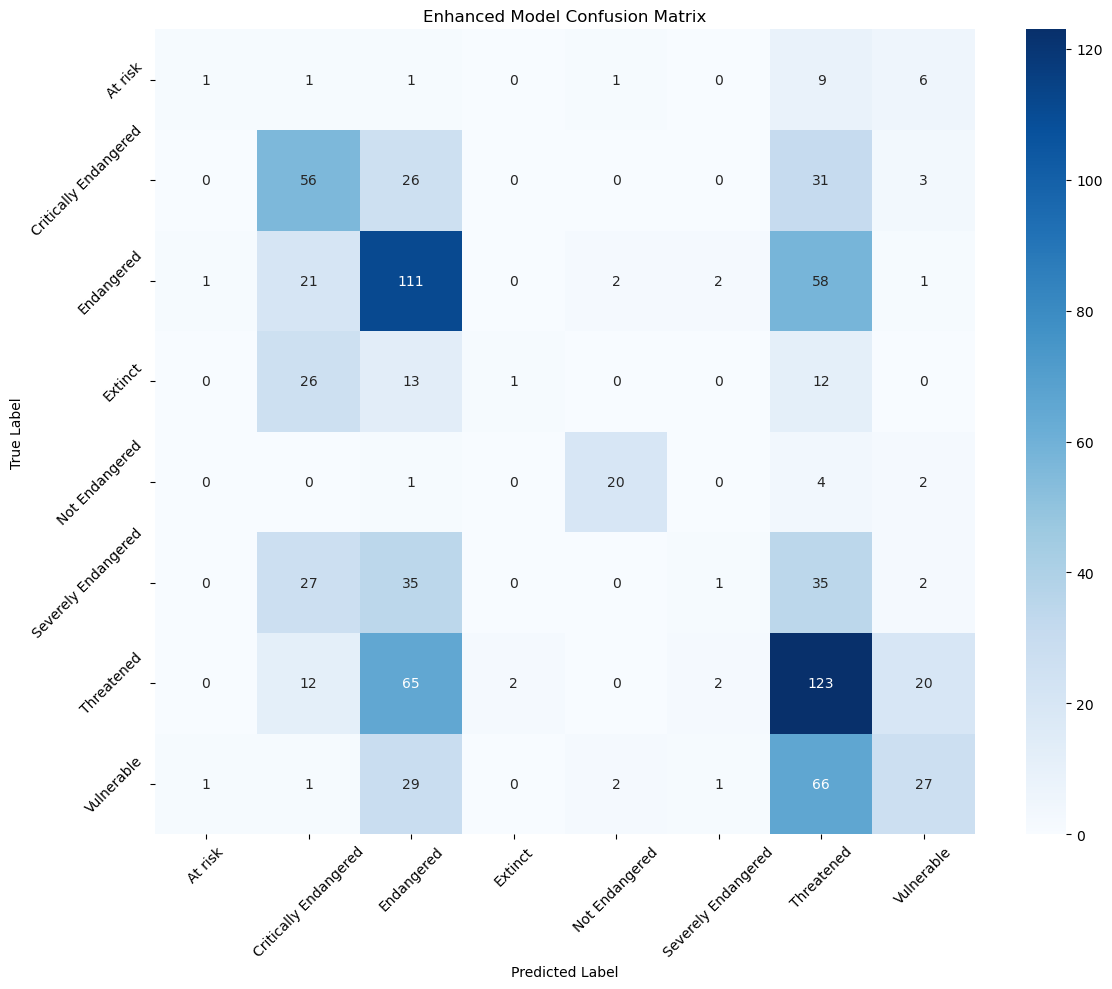

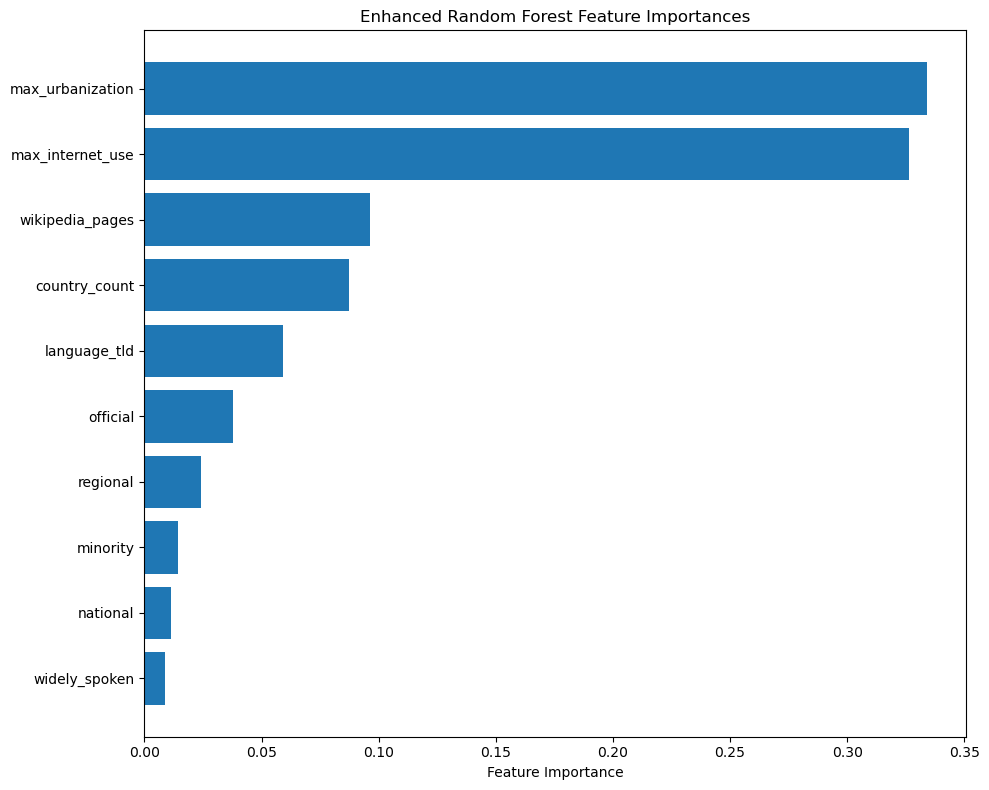


Detailed Feature Importance:
            feature  importance
6  max_urbanization    0.333855
7  max_internet_use    0.326314
9   wikipedia_pages    0.096223
5     country_count    0.087534
8      language_tld    0.059219
0          official    0.038045
1          regional    0.024198
2          minority    0.014351
3          national    0.011555
4     widely_spoken    0.008705

Cross-validation scores: [0.41791045 0.39054726 0.40298507 0.35572139 0.42394015]
Mean CV accuracy: 0.398 (+/- 0.048)

Training accuracy: 0.476
Testing accuracy: 0.395
Overfitting gap: 0.081

Per-Class Performance:
                   Class  Precision    Recall  F1-Score  Support
4         Not Endangered   0.800000  0.740741  0.769231       27
2             Endangered   0.395018  0.566327  0.465409      196
6             Threatened   0.363905  0.549107  0.437722      224
1  Critically Endangered   0.388889  0.482759  0.430769      116
7             Vulnerable   0.442623  0.212598  0.287234      127
0           

In [10]:

enhanced_df = add_language_features(df)
 
#Train the model
rf_language_enhanced, X_train, X_test, y_train, y_test = train_enhanced_language_model(enhanced_df)
 
# Evaluate the model
accuracy, class_performance = evaluate_enhanced_model(rf_language_enhanced, X_test, y_test, X_train, y_train)

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                             ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Check if optional libraries are available
try:
    from xgboost import XGBClassifier
    HAS_XGBOOST = True
except ImportError:
    HAS_XGBOOST = False
    print("XGBoost not available. Install with: pip install xgboost")

try:
    from lightgbm import LGBMClassifier
    HAS_LIGHTGBM = True
except ImportError:
    HAS_LIGHTGBM = False
    print("LightGBM not available. Install with: pip install lightgbm")

try:
    from imblearn.over_sampling import SMOTE, ADASYN
    from imblearn.combine import SMOTETomek
    HAS_IMBALANCED_LEARN = True
except ImportError:
    HAS_IMBALANCED_LEARN = False
    print("imbalanced-learn not available. Install with: pip install imbalanced-learn")

def prepare_features_with_engineering(df):
    """
    Prepare features with additional feature engineering
    """
    # Create copy to avoid modifying original
    df_feat = df.copy()
    
    # Ensure numeric columns are properly typed
    numeric_cols = ['speakers', 'official', 'regional', 'minority', 'national', 
                   'widely_spoken', 'country_count', 'max_urbanization', 
                   'max_internet_use', 'language_tld', 'wikipedia_pages']
    
    for col in numeric_cols:
        if col in df_feat.columns:
            df_feat[col] = pd.to_numeric(df_feat[col], errors='coerce').fillna(0)
    
    # Add ratio features
    df_feat['digital_presence_ratio'] = (df_feat['wikipedia_pages'] + 1) / (df_feat['speakers'] + 1)
    df_feat['urbanization_internet_product'] = df_feat['max_urbanization'] * df_feat['max_internet_use']
    df_feat['official_national_sum'] = df_feat['official'] + df_feat['national']
    df_feat['minority_regional_sum'] = df_feat['minority'] + df_feat['regional']
    
    # Log transform skewed features
    df_feat['log_speakers'] = np.log1p(df_feat['speakers'])
    df_feat['log_wikipedia'] = np.log1p(df_feat['wikipedia_pages'])
    df_feat['log_tld_domains'] = np.log1p(df_feat['language_tld'])
    
    # Interaction features
    df_feat['speakers_urbanization'] = df_feat['speakers'] * df_feat['max_urbanization']
    df_feat['speakers_internet'] = df_feat['speakers'] * df_feat['max_internet_use']
    
    # Replace any infinities or NaNs
    df_feat = df_feat.replace([np.inf, -np.inf], 0)
    df_feat = df_feat.fillna(0)
    
    return df_feat

def handle_class_imbalance(X_train, y_train, method='class_weight'):
    """
    Handle class imbalance using available methods
    """
    if HAS_IMBALANCED_LEARN and method == 'smote':
        smote = SMOTE(random_state=42, k_neighbors=min(5, min(np.bincount(y_train)) - 1))
        return smote.fit_resample(X_train, y_train)
    else:
        # Return original data if SMOTE not available
        return X_train, y_train

def train_gradient_boosting_model(df):
    """
    Train Gradient Boosting model (sklearn version)
    """
    print("Training Gradient Boosting model...")
    
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Select features
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
        'digital_presence_ratio', 'urbanization_internet_product', 
        'official_national_sum', 'minority_regional_sum',
        'log_speakers', 'log_wikipedia', 'log_tld_domains',
        'speakers_urbanization', 'speakers_internet'
    ]
    
    X = df_feat[feature_cols]
    y = df_feat['level']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Gradient Boosting
    gb_model = GradientBoostingClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    
    gb_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = gb_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Gradient Boosting Test Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return gb_model, scaler, feature_cols, X_train, X_test, y_train, y_test

def train_extra_trees_model(df):
    """
    Train Extra Trees model with class balancing
    """
    print("\nTraining Extra Trees model...")
    
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Select features
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
        'digital_presence_ratio', 'urbanization_internet_product', 
        'official_national_sum', 'minority_regional_sum',
        'log_speakers', 'log_wikipedia', 'log_tld_domains',
        'speakers_urbanization', 'speakers_internet'
    ]
    
    X = df_feat[feature_cols]
    y = df_feat['level']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Train Extra Trees
    et_model = ExtraTreesClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    et_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = et_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Extra Trees Test Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return et_model, feature_cols, X_train, X_test, y_train, y_test

def train_xgboost_model(df):
    """
    Train XGBoost model if available
    """
    if not HAS_XGBOOST:
        print("XGBoost not available. Skipping...")
        return None, None, None, None, None, None, None
    
    print("\nTraining XGBoost model...")
    
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Select features
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
        'digital_presence_ratio', 'urbanization_internet_product', 
        'official_national_sum', 'minority_regional_sum',
        'log_speakers', 'log_wikipedia', 'log_tld_domains',
        'speakers_urbanization', 'speakers_internet'
    ]
    
    X = df_feat[feature_cols]
    y = df_feat['level']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Handle class imbalance
    X_train_balanced, y_train_balanced = handle_class_imbalance(X_train_scaled, y_train)
    
    # Train XGBoost
    xgb_model = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
    
    xgb_model.fit(X_train_balanced, y_train_balanced)
    
    # Predictions
    y_pred = xgb_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"XGBoost Test Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return xgb_model, scaler, feature_cols, X_train, X_test, y_train, y_test

def train_lightgbm_model(df):
    """
    Train LightGBM model if available
    """
    if not HAS_LIGHTGBM:
        print("LightGBM not available. Skipping...")
        return None, None, None, None, None, None
    
    print("\nTraining LightGBM model...")
    
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Select features
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
        'digital_presence_ratio', 'urbanization_internet_product', 
        'official_national_sum', 'minority_regional_sum',
        'log_speakers', 'log_wikipedia', 'log_tld_domains',
        'speakers_urbanization', 'speakers_internet'
    ]
    
    X = df_feat[feature_cols]
    y = df_feat['level']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Train LightGBM
    lgb_model = LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    )
    
    lgb_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = lgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"LightGBM Test Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return lgb_model, feature_cols, X_train, X_test, y_train, y_test

def train_neural_network(df):
    """
    Train Neural Network with proper preprocessing
    """
    print("\nTraining Neural Network...")
    
    try:
        # Prepare features
        df_feat = prepare_features_with_engineering(df)
        
        # Select features
        feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
            'digital_presence_ratio', 'urbanization_internet_product', 
            'official_national_sum', 'minority_regional_sum',
            'log_speakers', 'log_wikipedia', 'log_tld_domains',
            'speakers_urbanization', 'speakers_internet'
        ]
        
        # Filter to only include columns that exist
        feature_cols = [col for col in feature_cols if col in df_feat.columns]
        
        X = df_feat[feature_cols].values.astype(np.float32)
        y = df_feat['level'].values
        
        # Encode labels to integers if they're strings
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
        )
        
        # Scale features (important for neural networks)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Handle any remaining NaN or inf values
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)
        
        # Handle class imbalance
        X_train_balanced, y_train_balanced = handle_class_imbalance(X_train_scaled, y_train)
        
        # Train Neural Network
        nn_model = MLPClassifier(
            hidden_layer_sizes=(100, 50, 25),
            activation='relu',
            solver='adam',
            alpha=0.001,
            learning_rate='adaptive',
            learning_rate_init=0.001,
            max_iter=500,
            early_stopping=True,
            validation_fraction=0.1,
            random_state=42,
            verbose=False
        )
        
        nn_model.fit(X_train_balanced, y_train_balanced)
        
        # Predictions
        y_pred = nn_model.predict(X_test_scaled)
        
        # Convert back to original labels for reporting
        y_test_original = le.inverse_transform(y_test)
        y_pred_original = le.inverse_transform(y_pred)
        
        accuracy = accuracy_score(y_test_original, y_pred_original)
        
        print(f"Neural Network Test Accuracy: {accuracy:.3f}")
        print("\nClassification Report:")
        print(classification_report(y_test_original, y_pred_original))
        
        return nn_model, scaler, feature_cols, X_train, X_test, y_train, y_test
        
    except Exception as e:
        print(f"Error training Neural Network: {str(e)}")
        return None, None, None, None, None, None, None

def train_svm_model(df):
    """
    Train SVM model with RBF kernel
    """
    print("\nTraining SVM model...")
    
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Select features
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
        'digital_presence_ratio', 'urbanization_internet_product', 
        'official_national_sum', 'minority_regional_sum',
        'log_speakers', 'log_wikipedia', 'log_tld_domains',
        'speakers_urbanization', 'speakers_internet'
    ]
    
    X = df_feat[feature_cols]
    y = df_feat['level']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Scale features (important for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train SVM
    svm_model = SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    )
    
    svm_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"SVM Test Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return svm_model, scaler, feature_cols, X_train, X_test, y_train, y_test

def train_ensemble_model(df):
    """
    Train an ensemble of the best available models
    """
    print("\nTraining Ensemble Model...")
    
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Select features
    feature_cols = list(df.columns[4:12]) + ['language_tld', 'wikipedia_pages'] + [
        'digital_presence_ratio', 'urbanization_internet_product', 
        'official_national_sum', 'minority_regional_sum',
        'log_speakers', 'log_wikipedia', 'log_tld_domains',
        'speakers_urbanization', 'speakers_internet'
    ]
    
    X = df_feat[feature_cols]
    y = df_feat['level']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create base models
    estimators = []
    
    # Always include these
    estimators.append(('gb', GradientBoostingClassifier(
        n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42
    )))
    
    estimators.append(('et', ExtraTreesClassifier(
        n_estimators=100, max_depth=10, class_weight='balanced', random_state=42
    )))
    
    estimators.append(('rf', RandomForestClassifier(
        n_estimators=100, max_depth=10, class_weight='balanced', random_state=42
    )))
    
    # Add optional models if available
    if HAS_XGBOOST:
        estimators.append(('xgb', XGBClassifier(
            n_estimators=100, max_depth=5, learning_rate=0.1,
            random_state=42, use_label_encoder=False, eval_metric='mlogloss'
        )))
    
    if HAS_LIGHTGBM:
        estimators.append(('lgb', LGBMClassifier(
            n_estimators=100, max_depth=5, learning_rate=0.1,
            random_state=42, class_weight='balanced', verbose=-1
        )))
    
    # Create ensemble
    ensemble = VotingClassifier(estimators=estimators, voting='soft')
    
    # Train ensemble
    ensemble.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = ensemble.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Ensemble Test Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.title('Ensemble Model Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return ensemble, scaler, feature_cols, X_train, X_test, y_train, y_test

def compare_all_models(df):
    """
    Train and compare all available models
    """
    print("=" * 60)
    print("COMPARING ALL AVAILABLE MODELS")
    print("=" * 60)
    
    results = {}
    
    try:
        # Gradient Boosting (sklearn)
        gb_model, gb_scaler, features, X_train, X_test, y_train, y_test = train_gradient_boosting_model(df)
        if gb_model is not None:
            gb_scaled_test = gb_scaler.transform(X_test)
            results['Gradient Boosting'] = accuracy_score(y_test, gb_model.predict(gb_scaled_test))
    except Exception as e:
        print(f"Error with Gradient Boosting: {str(e)}")
    
    try:
        # Extra Trees
        et_model, features, X_train, X_test, y_train, y_test = train_extra_trees_model(df)
        if et_model is not None:
            results['Extra Trees'] = accuracy_score(y_test, et_model.predict(X_test))
    except Exception as e:
        print(f"Error with Extra Trees: {str(e)}")
    
    try:
        # Neural Network
        nn_model, nn_scaler, features, X_train, X_test, y_train, y_test = train_neural_network(df)
        if nn_model is not None:
            nn_scaled_test = nn_scaler.transform(X_test)
            nn_scaled_test = np.nan_to_num(nn_scaled_test, nan=0.0, posinf=0.0, neginf=0.0)
            results['Neural Network'] = accuracy_score(y_test, nn_model.predict(nn_scaled_test))
    except Exception as e:
        print(f"Error with Neural Network: {str(e)}")
    
    try:
        # SVM
        svm_model, svm_scaler, features, X_train, X_test, y_train, y_test = train_svm_model(df)
        if svm_model is not None:
            svm_scaled_test = svm_scaler.transform(X_test)
            results['SVM'] = accuracy_score(y_test, svm_model.predict(svm_scaled_test))
    except Exception as e:
        print(f"Error with SVM: {str(e)}")
    
    # Optional models
    if HAS_XGBOOST:
        try:
            xgb_model, xgb_scaler, features, X_train, X_test, y_train, y_test = train_xgboost_model(df)
            if xgb_model is not None:
                xgb_scaled_test = xgb_scaler.transform(X_test)
                results['XGBoost'] = accuracy_score(y_test, xgb_model.predict(xgb_scaled_test))
        except Exception as e:
            print(f"Error with XGBoost: {str(e)}")
    
    if HAS_LIGHTGBM:
        try:
            lgb_model, features, X_train, X_test, y_train, y_test = train_lightgbm_model(df)
            if lgb_model is not None:
                results['LightGBM'] = accuracy_score(y_test, lgb_model.predict(X_test))
        except Exception as e:
            print(f"Error with LightGBM: {str(e)}")
    
    try:
        # Ensemble
        ensemble_model, ens_scaler, features, X_train, X_test, y_train, y_test = train_ensemble_model(df)
        if ensemble_model is not None:
            ens_scaled_test = ens_scaler.transform(X_test)
            results['Ensemble'] = accuracy_score(y_test, ensemble_model.predict(ens_scaled_test))
    except Exception as e:
        print(f"Error with Ensemble: {str(e)}")
    
    if not results:
        print("No models were successfully trained!")
        return results
    
    # Summary
    print("\n" + "=" * 60)
    print("MODEL COMPARISON SUMMARY")
    print("=" * 60)
    for model, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f"{model:20s}: {accuracy:.3f}")
    
    # Plot comparison
    plt.figure(figsize=(10, 6))
    models = list(results.keys())
    accuracies = list(results.values())
    colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
    bars = plt.bar(models, accuracies, color=colors)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.3f}', ha='center', va='bottom')
    
    plt.ylim(0, 1)
    plt.ylabel('Test Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Feature importance from best model
    if results:
        best_model_name = max(results, key=results.get)
        print(f"\nBest performing model: {best_model_name} with {results[best_model_name]:.3f} accuracy")
    
    return results


COMPARING ALL AVAILABLE MODELS
Training Gradient Boosting model...
Gradient Boosting Test Accuracy: 0.713

Classification Report:
                       precision    recall  f1-score   support

              At risk       0.47      0.37      0.41        19
Critically Endangered       0.79      0.79      0.79       116
           Endangered       0.68      0.69      0.68       196
              Extinct       1.00      0.96      0.98        52
       Not Endangered       1.00      0.96      0.98        27
  Severely Endangered       0.53      0.48      0.51       100
           Threatened       0.71      0.80      0.75       224
           Vulnerable       0.68      0.60      0.64       127

             accuracy                           0.71       861
            macro avg       0.73      0.71      0.72       861
         weighted avg       0.71      0.71      0.71       861


Training Extra Trees model...
Extra Trees Test Accuracy: 0.769

Classification Report:
                       

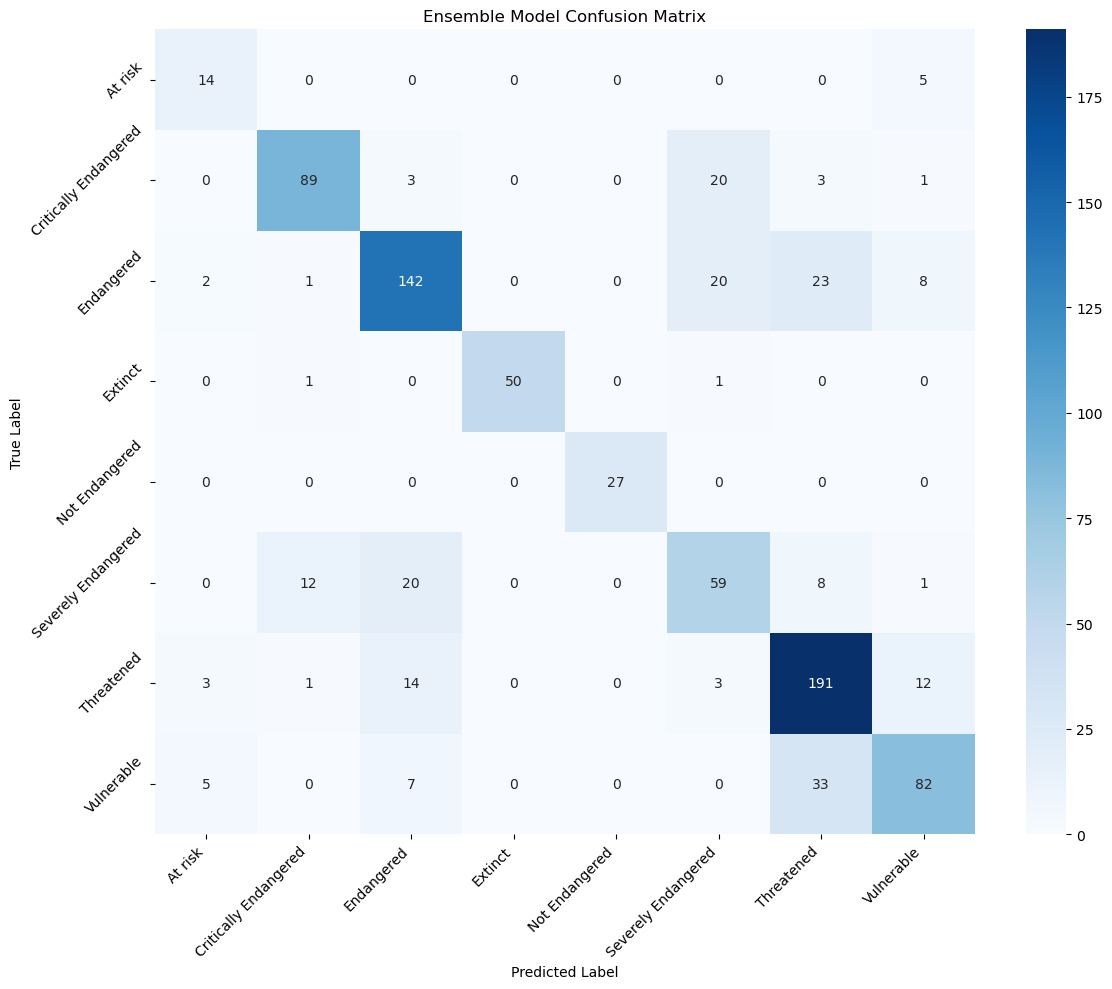


MODEL COMPARISON SUMMARY
Extra Trees         : 0.769
Ensemble            : 0.760
Neural Network      : 0.719
LightGBM            : 0.719
Gradient Boosting   : 0.713
SVM                 : 0.706


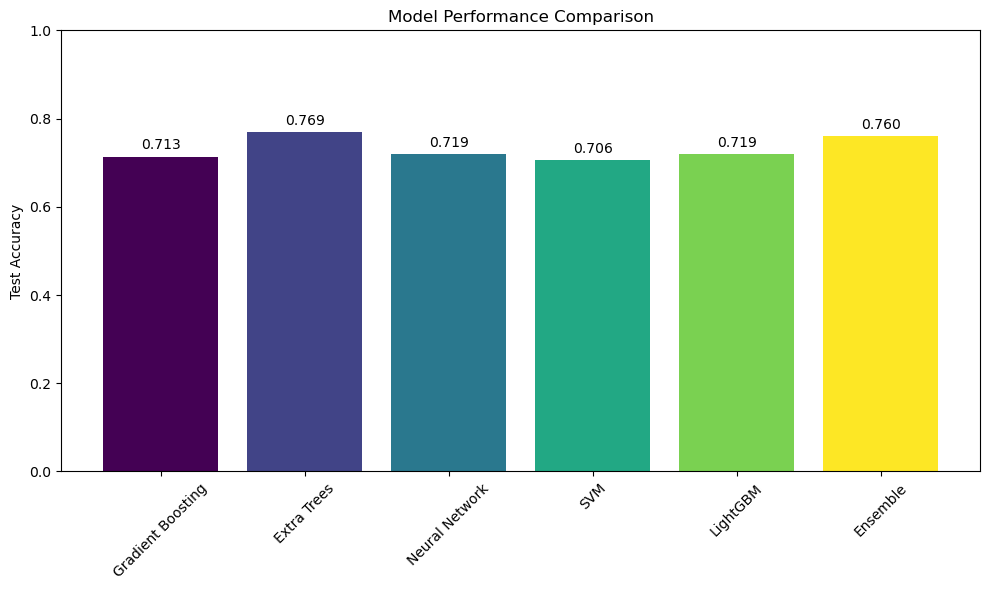


Best performing model: Extra Trees with 0.769 accuracy
Training Gradient Boosting model...
Gradient Boosting Test Accuracy: 0.713

Classification Report:
                       precision    recall  f1-score   support

              At risk       0.47      0.37      0.41        19
Critically Endangered       0.79      0.79      0.79       116
           Endangered       0.68      0.69      0.68       196
              Extinct       1.00      0.96      0.98        52
       Not Endangered       1.00      0.96      0.98        27
  Severely Endangered       0.53      0.48      0.51       100
           Threatened       0.71      0.80      0.75       224
           Vulnerable       0.68      0.60      0.64       127

             accuracy                           0.71       861
            macro avg       0.73      0.71      0.72       861
         weighted avg       0.71      0.71      0.71       861


Training Extra Trees model...
Extra Trees Test Accuracy: 0.769

Classification Report

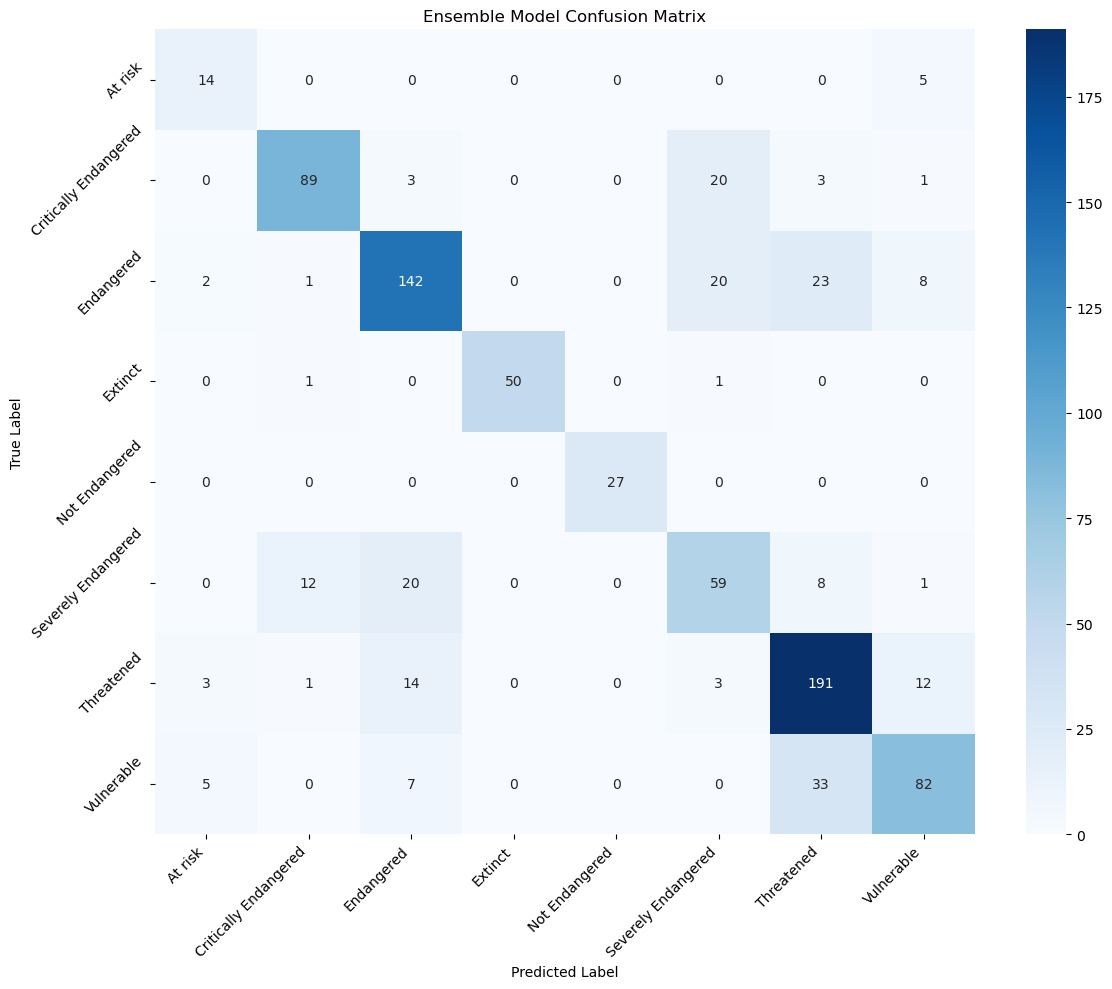

In [12]:

#new_df = add_language_features_quick(enhanced_df)  # Assuming features are already added
df = enhanced_df
results = compare_all_models(enhanced_df)

# Individual models:
gb_model, scaler, features, X_train, X_test, y_train, y_test = train_gradient_boosting_model(enhanced_df)
et_model, features, X_train, X_test, y_train, y_test = train_extra_trees_model(enhanced_df)
nn_model, scaler, features, X_train, X_test, y_train, y_test = train_neural_network(enhanced_df)
svm_model, scaler, features, X_train, X_test, y_train, y_test = train_svm_model(enhanced_df)
ensemble_model, scaler, features, X_train, X_test, y_train, y_test = train_ensemble_model(enhanced_df)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

def plot_feature_importance(model, feature_names, model_name, X_test=None, y_test=None, 
                          scaler=None, use_permutation=False):
    """
    Plot feature importance for a given model
    """
    plt.figure(figsize=(10, 8))
    
    if use_permutation and X_test is not None and y_test is not None:
        # Use permutation importance for models without built-in feature importance
        if scaler is not None:
            X_test_scaled = scaler.transform(X_test)
        else:
            X_test_scaled = X_test
            
        perm_importance = permutation_importance(model, X_test_scaled, y_test, 
                                               n_repeats=10, random_state=42)
        importances = perm_importance.importances_mean
        std_devs = perm_importance.importances_std
    else:
        # Use built-in feature importance
        importances = model.feature_importances_
        std_devs = None
    
    # Create dataframe for sorting
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=True)
    
    # Create horizontal bar plot
    bars = plt.barh(importance_df['feature'], importance_df['importance'])
    
    # Color bars by importance
    colors = plt.cm.viridis(importance_df['importance'] / importance_df['importance'].max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # Add value labels
    for i, (idx, row) in enumerate(importance_df.iterrows()):
        plt.text(row['importance'] + 0.001, i, f'{row["importance"]:.3f}', 
                va='center', fontsize=9)
    
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title(f'{model_name} - Feature Importance', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features
    print(f"\nTop 10 Features for {model_name}:")
    print(importance_df.tail(10).to_string(index=False))

def plot_all_feature_importances(gb_model, et_model, nn_model, svm_model, ensemble_model,
                               features, X_test, y_test, gb_scaler, nn_scaler, svm_scaler):
    """
    Plot feature importances for all models
    """
    print("=" * 60)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("=" * 60)
    
    # 1. Gradient Boosting
    if gb_model is not None:
        plot_feature_importance(gb_model, features, "Gradient Boosting")
    
    # 2. Extra Trees
    if et_model is not None:
        plot_feature_importance(et_model, features, "Extra Trees")
    
    # 3. Neural Network (using permutation importance)
    if nn_model is not None:
        print("\nCalculating permutation importance for Neural Network...")
        plot_feature_importance(nn_model, features, "Neural Network", 
                              X_test, y_test, nn_scaler, use_permutation=True)
    
    # 4. SVM (using permutation importance)
    if svm_model is not None:
        print("\nCalculating permutation importance for SVM...")
        plot_feature_importance(svm_model, features, "Support Vector Machine", 
                              X_test, y_test, svm_scaler, use_permutation=True)
    
    # 5. Ensemble
    if ensemble_model is not None:
        # For voting classifier, we'll average the feature importances of tree-based models
        tree_importances = []
        for name, estimator in ensemble_model.named_estimators_.items():
            if hasattr(estimator, 'feature_importances_'):
                tree_importances.append(estimator.feature_importances_)
        
        if tree_importances:
            avg_importance = np.mean(tree_importances, axis=0)
            
            plt.figure(figsize=(10, 8))
            importance_df = pd.DataFrame({
                'feature': features,
                'importance': avg_importance
            }).sort_values('importance', ascending=True)
            
            bars = plt.barh(importance_df['feature'], importance_df['importance'])
            colors = plt.cm.viridis(importance_df['importance'] / importance_df['importance'].max())
            for bar, color in zip(bars, colors):
                bar.set_color(color)
            
            for i, (idx, row) in enumerate(importance_df.iterrows()):
                plt.text(row['importance'] + 0.001, i, f'{row["importance"]:.3f}', 
                        va='center', fontsize=9)
            
            plt.xlabel('Feature Importance', fontsize=12)
            plt.title('Ensemble Model - Average Feature Importance', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            print("\nTop 10 Features for Ensemble Model:")
            print(importance_df.tail(10).to_string(index=False))

def create_feature_importance_comparison(gb_model, et_model, features):
    """
    Create a comparison heatmap of feature importances across tree-based models
    """
    models_with_importance = []
    importance_matrix = []
    
    if gb_model is not None and hasattr(gb_model, 'feature_importances_'):
        models_with_importance.append('Gradient Boosting')
        importance_matrix.append(gb_model.feature_importances_)
    
    if et_model is not None and hasattr(et_model, 'feature_importances_'):
        models_with_importance.append('Extra Trees')
        importance_matrix.append(et_model.feature_importances_)
    
    if len(importance_matrix) > 1:
        # Create heatmap
        plt.figure(figsize=(12, 8))
        
        # Normalize importances for better comparison
        importance_matrix = np.array(importance_matrix)
        importance_matrix = importance_matrix / importance_matrix.sum(axis=1, keepdims=True)
        
        # Create dataframe
        importance_df = pd.DataFrame(importance_matrix.T, 
                                   index=features,
                                   columns=models_with_importance)
        
        # Sort by average importance
        importance_df['Average'] = importance_df.mean(axis=1)
        importance_df = importance_df.sort_values('Average', ascending=False)
        importance_df = importance_df.drop('Average', axis=1)
        
        # Plot heatmap
        sns.heatmap(importance_df.head(20).T, cmap='YlOrRd', annot=True, fmt='.3f', 
                    cbar_kws={'label': 'Normalized Importance'})
        plt.title('Feature Importance Comparison Across Models (Top 20)', 
                  fontsize=14, fontweight='bold')
        plt.xlabel('Features', fontsize=12)
        plt.ylabel('Models', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

def analyze_feature_correlations(df, features, top_n=10):
    """
    Analyze correlations between top features
    """
    # Prepare features
    df_feat = prepare_features_with_engineering(df)
    
    # Get feature data
    feature_data = df_feat[features]
    
    # Calculate correlation matrix
    corr_matrix = feature_data.corr()
    
    # Plot correlation heatmap for top features
    plt.figure(figsize=(10, 8))
    
    # Select top features based on variance
    top_features = feature_data.var().nlargest(top_n).index.tolist()
    
    sns.heatmap(corr_matrix.loc[top_features, top_features], 
                annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1)
    plt.title(f'Feature Correlation Matrix (Top {top_n} by Variance)', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


Training Gradient Boosting model...
Gradient Boosting Test Accuracy: 0.713

Classification Report:
                       precision    recall  f1-score   support

              At risk       0.47      0.37      0.41        19
Critically Endangered       0.79      0.79      0.79       116
           Endangered       0.68      0.69      0.68       196
              Extinct       1.00      0.96      0.98        52
       Not Endangered       1.00      0.96      0.98        27
  Severely Endangered       0.53      0.48      0.51       100
           Threatened       0.71      0.80      0.75       224
           Vulnerable       0.68      0.60      0.64       127

             accuracy                           0.71       861
            macro avg       0.73      0.71      0.72       861
         weighted avg       0.71      0.71      0.71       861


Training Extra Trees model...
Extra Trees Test Accuracy: 0.769

Classification Report:
                       precision    recall  f1-score  

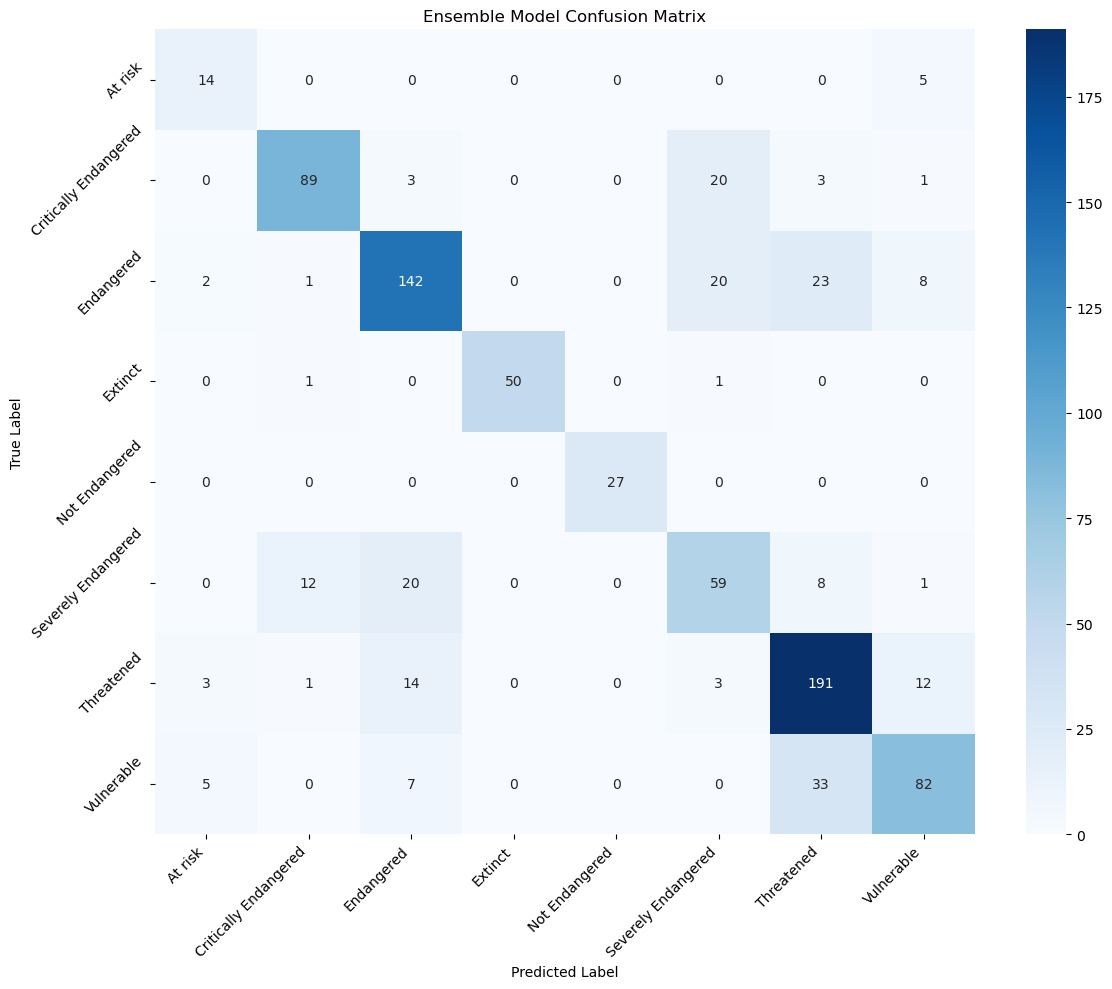

FEATURE IMPORTANCE ANALYSIS


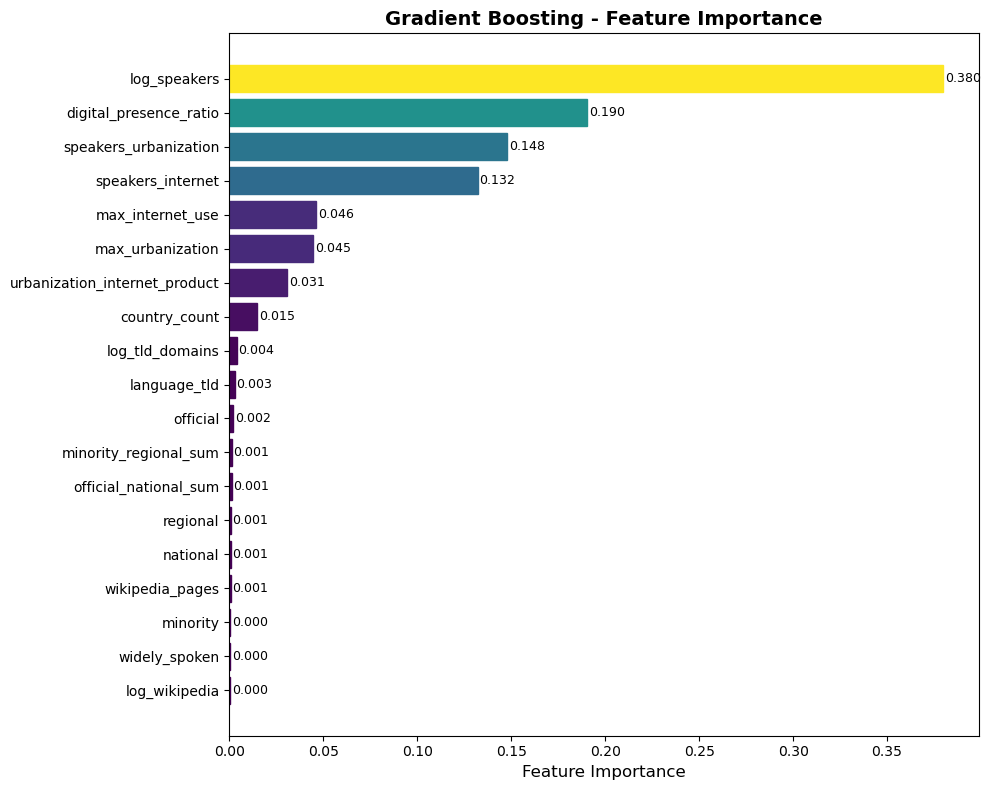


Top 10 Features for Gradient Boosting:
                      feature  importance
                 language_tld    0.002681
              log_tld_domains    0.003784
                country_count    0.014657
urbanization_internet_product    0.030831
             max_urbanization    0.044671
             max_internet_use    0.046181
            speakers_internet    0.132063
        speakers_urbanization    0.147578
       digital_presence_ratio    0.190414
                 log_speakers    0.379904


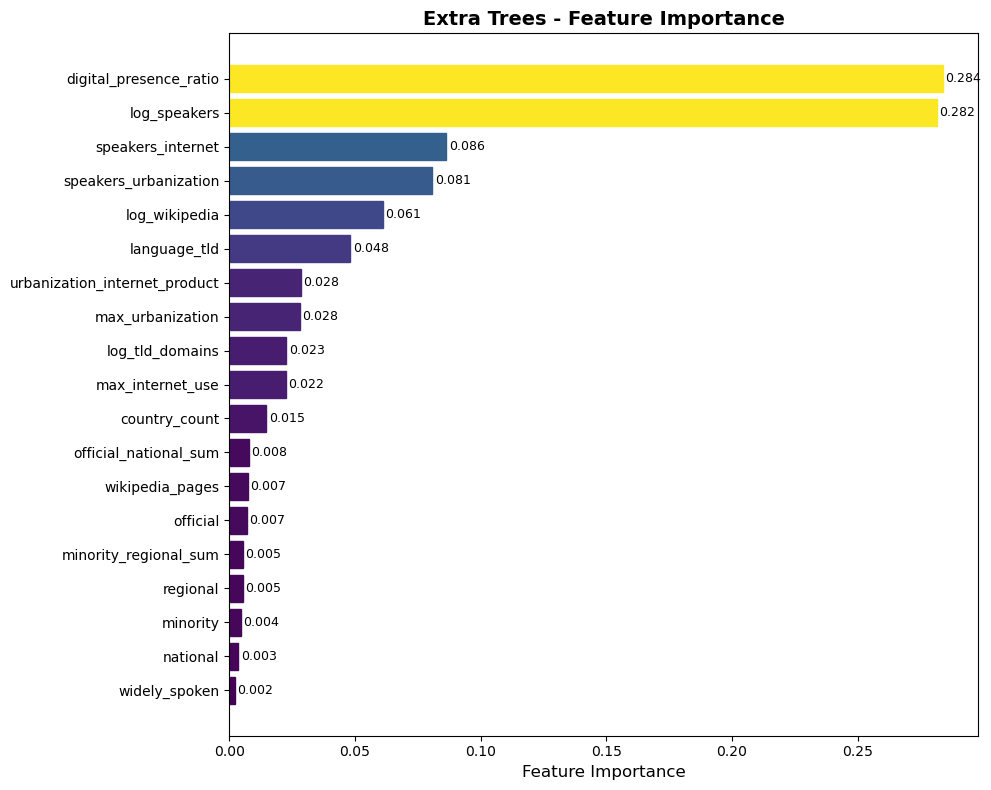


Top 10 Features for Extra Trees:
                      feature  importance
             max_internet_use    0.022394
              log_tld_domains    0.022568
             max_urbanization    0.028028
urbanization_internet_product    0.028378
                 language_tld    0.048140
                log_wikipedia    0.061076
        speakers_urbanization    0.080681
            speakers_internet    0.086209
                 log_speakers    0.281583
       digital_presence_ratio    0.283790

Calculating permutation importance for Neural Network...


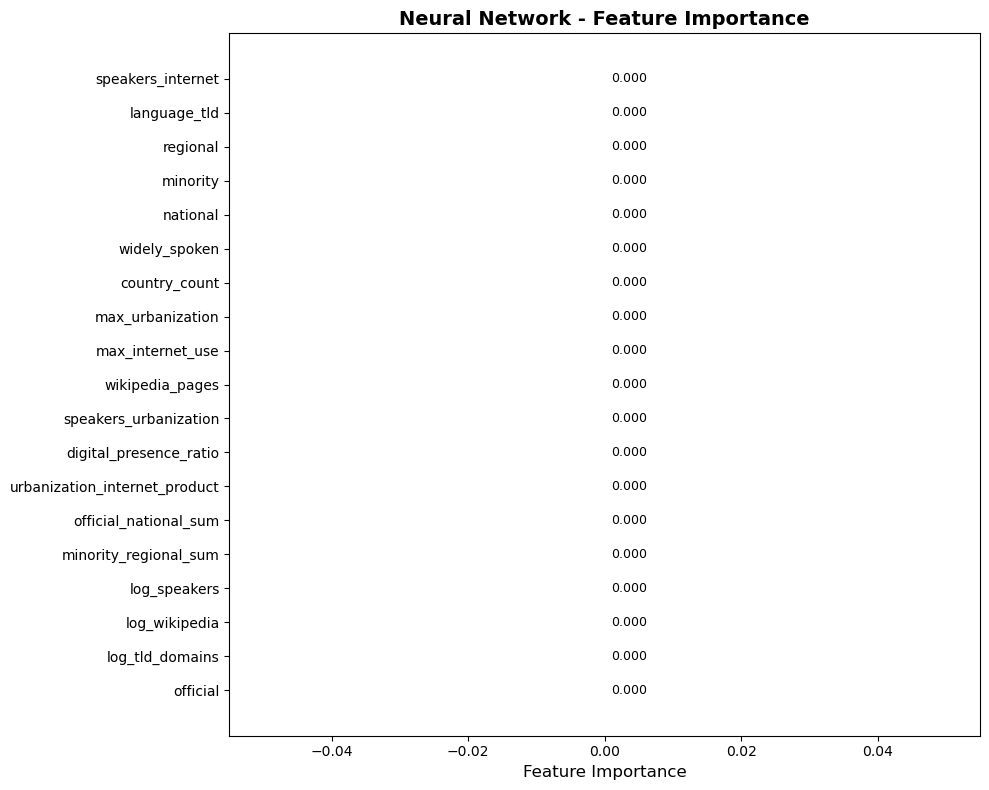


Top 10 Features for Neural Network:
          feature  importance
  wikipedia_pages         0.0
 max_internet_use         0.0
 max_urbanization         0.0
    country_count         0.0
    widely_spoken         0.0
         national         0.0
         minority         0.0
         regional         0.0
     language_tld         0.0
speakers_internet         0.0

Calculating permutation importance for SVM...


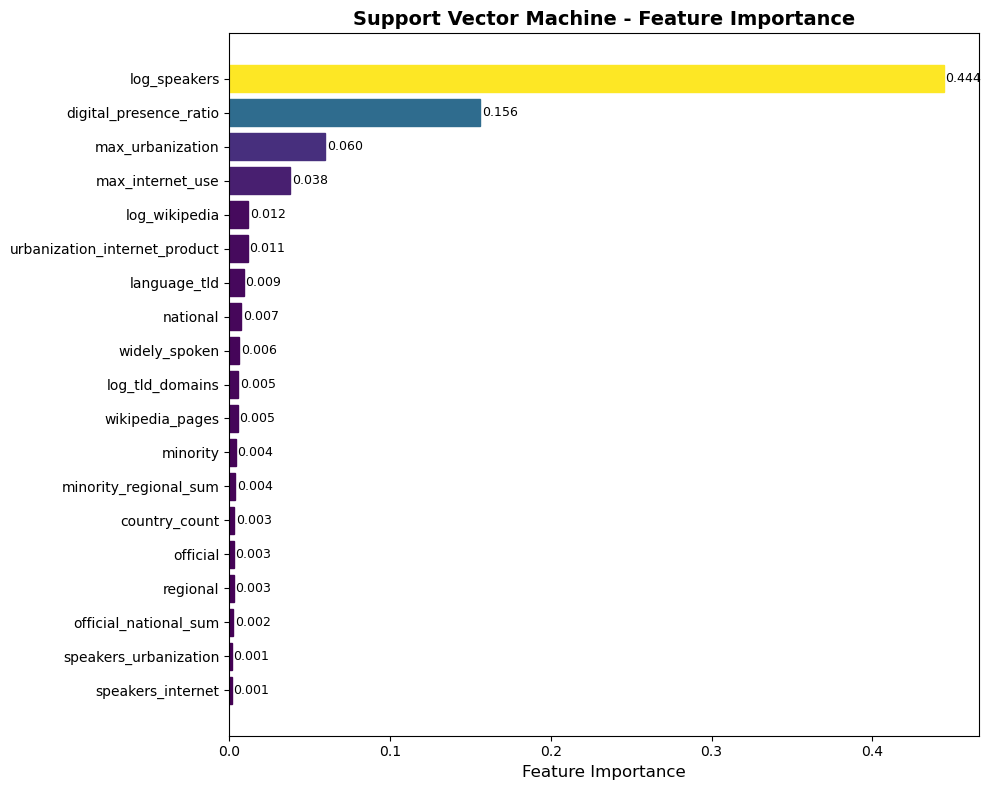


Top 10 Features for Support Vector Machine:
                      feature  importance
              log_tld_domains    0.005459
                widely_spoken    0.006156
                     national    0.007201
                 language_tld    0.008827
urbanization_internet_product    0.011498
                log_wikipedia    0.011614
             max_internet_use    0.037747
             max_urbanization    0.059698
       digital_presence_ratio    0.156098
                 log_speakers    0.444367


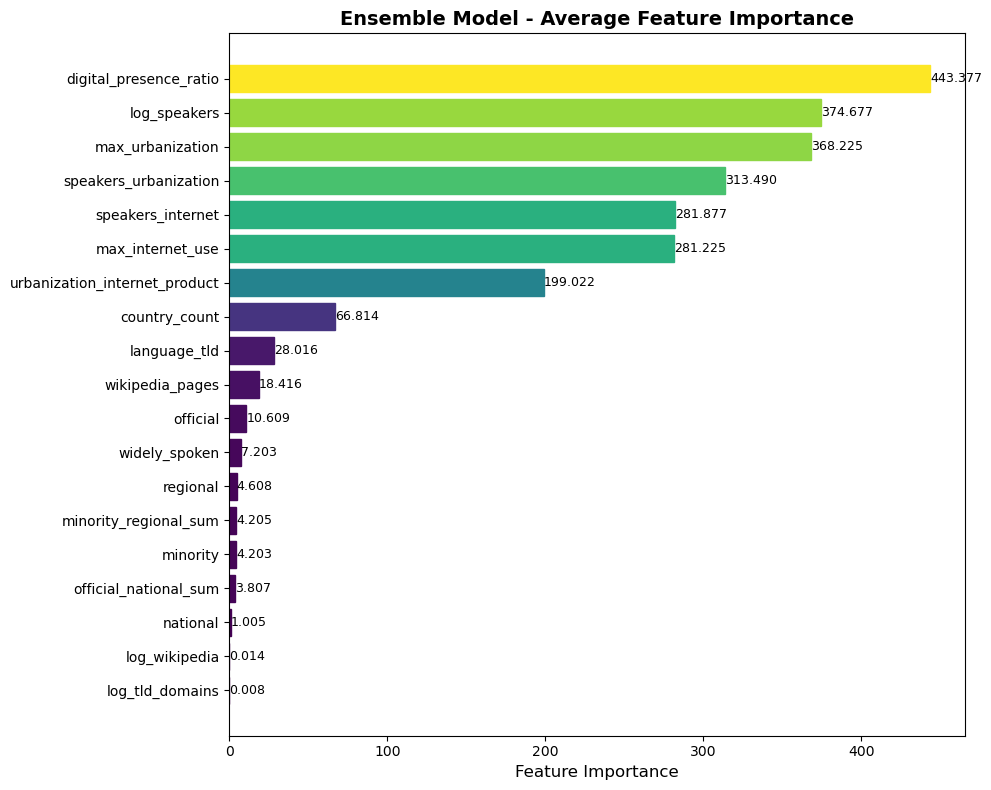


Top 10 Features for Ensemble Model:
                      feature  importance
              wikipedia_pages   18.415856
                 language_tld   28.016141
                country_count   66.813590
urbanization_internet_product  199.021975
             max_internet_use  281.224534
            speakers_internet  281.877085
        speakers_urbanization  313.489788
             max_urbanization  368.224700
                 log_speakers  374.677158
       digital_presence_ratio  443.377183


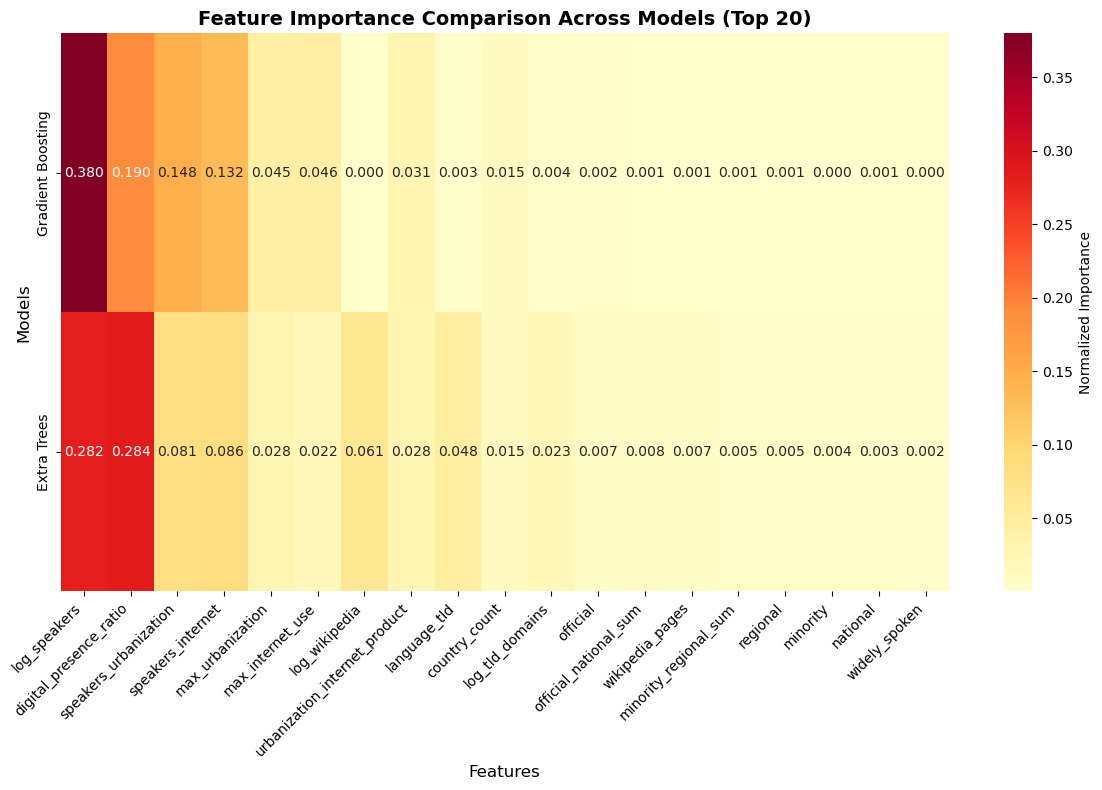

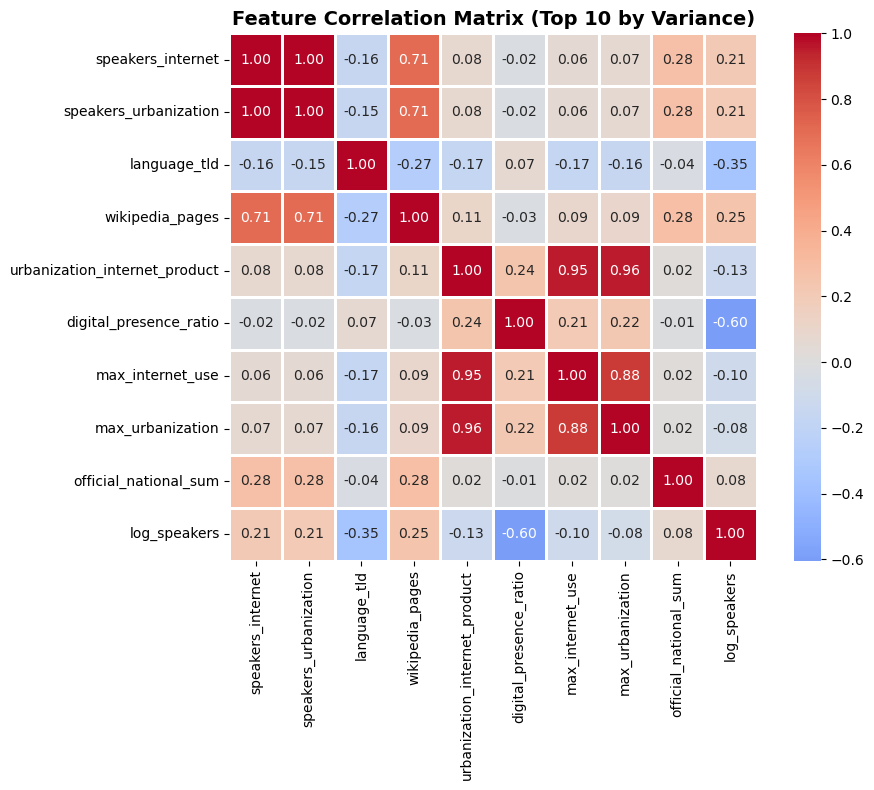

In [14]:
gb_model, gb_scaler, features, X_train, X_test, y_train, y_test = train_gradient_boosting_model(enhanced_df)
et_model, features, X_train, X_test, y_train, y_test = train_extra_trees_model(enhanced_df)
nn_model, nn_scaler, features, X_train, X_test, y_train, y_test = train_neural_network(enhanced_df)
svm_model, svm_scaler, features, X_train, X_test, y_train, y_test = train_svm_model(enhanced_df)
ensemble_model, ens_scaler, features, X_train, X_test, y_train, y_test = train_ensemble_model(enhanced_df)

plot_all_feature_importances(gb_model, et_model, nn_model, svm_model, ensemble_model,
                           features, X_test, y_test, gb_scaler, nn_scaler, svm_scaler)

# Comparison heatmap:
create_feature_importance_comparison(gb_model, et_model, features)

# Feature correlation analysis:
analyze_feature_correlations(enhanced_df, features)